In [3]:
%matplotlib inline  
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.tools import input_factory, plot_tools, spike_tools
from neurodynex.neuron_type import neurons



What is the threshold current for repetitive firing for NeuronX and NeuronY?

Exploring various values of I_amp, find the range in which the threshold occurs, to a precision of 0.01.

Plot the responses to step current which starts after 100ms (to let the system equilibrate) and lasting at least 1000ms (to detect repetitive firing with a long period). You can do this by modifying the code example given above. Make sure to check the documentation of the functions you use: input_factory.get_step_current(), neuron_type.neurons.run() and neuron_type.neurons.plot_data().

Already from the voltage response near threshold you might have an idea which is type I or II, but let’s investigate further.

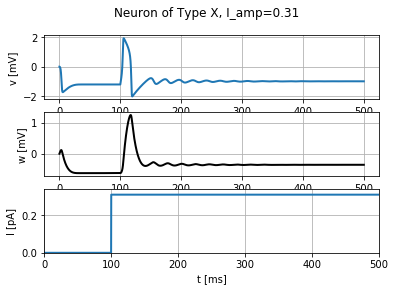

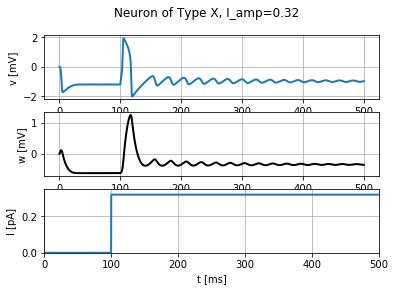

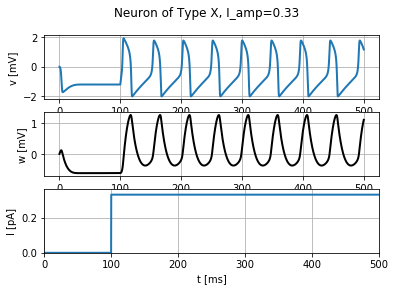

In [17]:
# create an input current
I_vecx=[0.31,0.32, 0.33]
#Type II

for I_amp in I_vecx:
    input_current = input_factory.get_step_current(100, 1100, 1.*b2.ms, I_amp*b2.pA)

    # get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
    a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
    # simulate it and get the state variables
    state_monitor = a_neuron_of_type_X.run(input_current, 500*b2.ms)
    # plot state vs. time
    plt.figure(figsize=(10,10),dpi=80)
    neurons.plot_data(state_monitor, title="Neuron of Type X, I_amp="+str(I_amp))


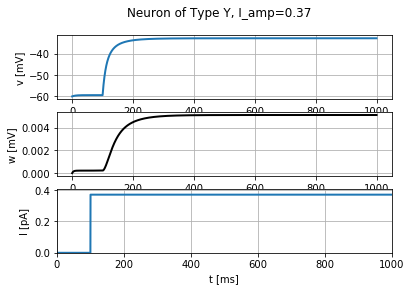

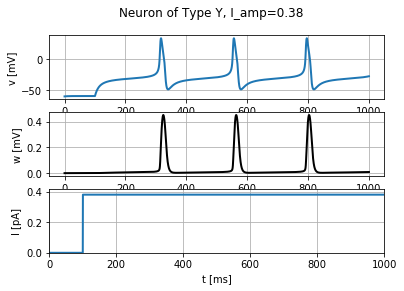

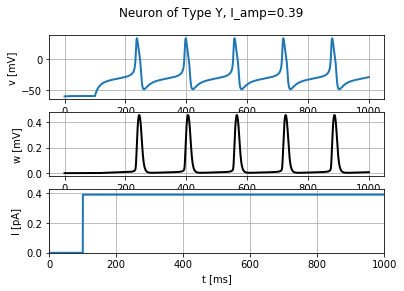

In [19]:

I_vecy=[0.37, 0.38]
#type I

for I_amp in I_vecy:
    input_current = input_factory.get_step_current(100, 1000, 1.*b2.ms, I_amp*b2.pA)
    # get an instance of class NeuronY
    a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
    state_monitor = a_neuron_of_type_Y.run(input_current, 1000*b2.ms)
    neurons.plot_data(state_monitor, title="Neuron of Type Y, I_amp="+str(I_amp))

## 9.2.1. Get firing rates from simulations

[ 103.4  144.9  184.4  223.9  263.4  302.9  342.4  381.9  421.4  460.9]


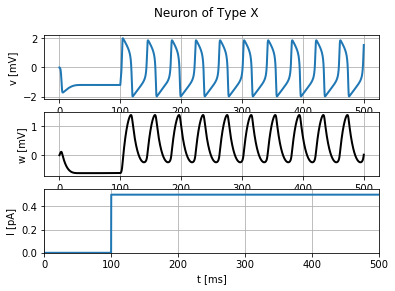

In [34]:
sim_time=500

input_current = input_factory.get_step_current(100, sim_time+100, b2.ms, 0.5*b2.pA)
state_monitor = a_neuron_of_type_X.run(input_current, sim_time*b2.ms)
spike_times = spike_tools.get_spike_time(state_monitor,  1.8*b2.mV)
print(spike_times/b2.ms)

plt.figure(figsize=(10,10),dpi=80)
neurons.plot_data(state_monitor, title="Neuron of Type X")

In [87]:
def get_firing_rate(neuron, input_current, spike_threshold=1.8,sim_time=500):
    state_monitor = neuron.run(input_current, sim_time*b2.ms)
    st = spike_tools.get_spike_time(state_monitor,  spike_threshold*b2.mV)/b2.ms
    if len(st)<2:
        print 'no spike times'
        return 0
    
    else:
       
    
        isi = st[1:]-st[:-1]
        
        
        f=np.mean(1/isi)/b2.ms
        print 'f=',f
        return f
    

no spike times
no spike times
no spike times
f= 23.46634609 Hz
f= 25.18089235 Hz
f= 26.2134336 Hz
f= 26.83411516 Hz
f= 27.15069177 Hz
f= 27.19031349 Hz
f= 26.97990467 Hz
f= 26.48422546 Hz
f= 25.6512883 Hz
f= 24.30368284 Hz
f= 21.73401235 Hz
no spike times
no spike times
no spike times
no spike times
no spike times


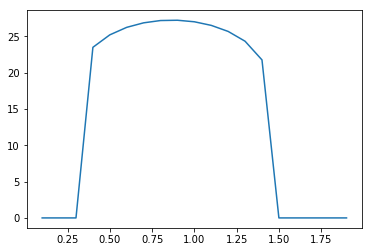

In [99]:

I=np.arange(0.1,2.0,0.1)
f=np.zeros(I.shape)
j=0
for I_amp in I:
    input_current = input_factory.get_step_current(100, sim_time+100, b2.ms, I_amp*b2.pA)
    f[j]=get_firing_rate(a_neuron_of_type_X, input_current)
    j+=1
    
plt.plot(I,f)

no spike times
no spike times
no spike times
f= 7.6394194 Hz
f= 14.37608534 Hz
f= 17.66265115 Hz
f= 19.807593 Hz
f= 21.31062015 Hz
f= 22.37139264 Hz
f= 23.20185615 Hz
f= 34.01360544 Hz
f= 44.05286344 Hz
no spike times
no spike times
no spike times
no spike times
no spike times
no spike times
no spike times


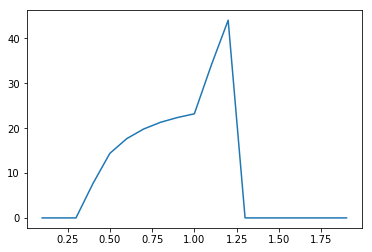

In [100]:

I=np.arange(0.1,2.0,0.1)
f=np.zeros(I.shape)
j=0
for I_amp in I:
    input_current = input_factory.get_step_current(100, sim_time+100, b2.ms, I_amp*b2.pA)
    f[j]=get_firing_rate(a_neuron_of_type_Y, input_current)
    j+=1
    
plt.plot(I,f)

In [106]:
def plot_fI_curve(NeuronClass):

    plt.figure()  # new figure

    #neuron = NeuronClass()  # instantiate the neuron class

    I = np.arange(0.0,1.1,0.1)  # a range of current inputs
    f = []

    # loop over current values
    for I_amp in I:

        firing_rate =get_firing_rate(NeuronClass, input_current) # insert here a call to your function get_firing_rate( ... )

        f.append(firing_rate)

    plt.plot(I, f)
    plt.xlabel('Amplitude of Injecting step current (pA)')
    plt.ylabel('Firing rate (Hz)')
    plt.grid()
    plt.show()

no spike times
no spike times
no spike times
no spike times
no spike times
no spike times
no spike times
no spike times
no spike times
no spike times
no spike times


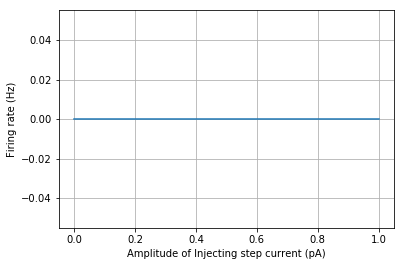

In [107]:
plot_fI_curve(a_neuron_of_type_Y)

In [108]:
print("a_neuron_of_type_X is : {}".format(a_neuron_of_type_X.get_neuron_type()))
print("a_neuron_of_type_Y is : {}".format(a_neuron_of_type_Y.get_neuron_type()))

a_neuron_of_type_X is : Type II
a_neuron_of_type_Y is : Type I
